In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ["BVMF:ABEV3", "BVMF:ITUB3"]
bvmf_data = pd.DataFrame()
for t in assets:
    bvmf_data[t] = wb.DataReader(t, data_source='google', start='2009-1-1')['Close']

In [4]:
bvmf_data.head()

,BVMF:ABEV3,BVMF:ITUB3
Date,,
2013-11-11,17.40,22.92
2013-11-12,17.06,22.89
2013-11-13,17.03,23.50
2013-11-14,17.47,23.73
2013-11-18,17.65,24.05


In [5]:
log_returns = np.log(bvmf_data / bvmf_data.shift(1)) # Normalizing returns by using log

In [6]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    weights = np.random.rand(n)
    weights /= np.sum(weights)
    return weights

# Create a random portfolio distribution weigths, that sums 100%
print(rand_weights(len(assets)))

[ 0.36336929  0.63663071]


In [10]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.0784899 ,  0.08043537,  0.03195933, ...,  0.0558244 ,
         0.05097454,  0.06489614]),
 array([ 0.2463288 ,  0.24991246,  0.21022389, ...,  0.21541013,
         0.2118676 ,  0.22514742]))

In [11]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

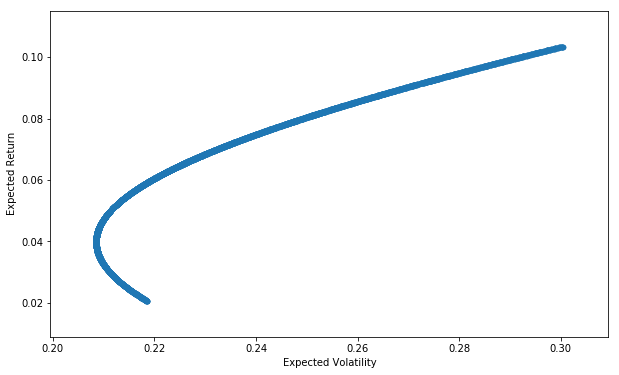

In [12]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')